In [1]:
import stt as st
import scanpy as sc
import matplotlib as mpl

In [2]:
adata = sc.read_h5ad('../data/toggle_switch/data_toggle_new.h5ad')
adata.obs['attractor']=adata.obs['leiden']

In [3]:
import scvelo as scv
scv.pp.moments(adata)

computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [4]:
def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    return dot_product / (norm_vec1 * norm_vec2)

In [5]:
import numpy as np
frac_list = np.arange(0.3,1,0.1)
st_acc_u = []
st_acc_s = []
st_time = []
scv_acc_u = []
scv_acc_s = []
scv_time = []

import time


for frac in frac_list:
    adata_sub = sc.pp.subsample(adata,fraction = frac,copy=True)
    
    start_time = time.time()  # Start the timer
    adata_aggr = st.tl.dynamical_iteration(adata_sub,n_states =2, n_iter = 10, n_neighbors = int(frac*100), n_components = 21,thresh_entropy = 0.1)
    end_time = time.time()  # End the timer
    st_time.append(end_time - start_time) 
    
    
    start_time = time.time()  # Start the timer
    scv.tl.velocity(adata_sub, mode='dynamical')
    end_time = time.time()  # End the timer
    scv_time.append(end_time - start_time) 

    arr1 = adata_sub.layers['v_u']
    arr2 = adata_sub.obsm['tensor_v_aver'][:,:,0]
    adata_sub.obs['cos_u_st'] = np.array([cosine_similarity(arr1[i, :], arr2[i, :]) for i in range(arr1.shape[0])])

    arr1 = adata_sub.layers['v_u']
    arr2 = adata_sub.layers['velocity_u']
    adata_sub.obs['cos_u_scv'] = np.array([cosine_similarity(arr1[i, :], arr2[i, :]) for i in range(arr1.shape[0])])

    arr1 = adata_sub.layers['v_s']
    arr2 = adata_sub.obsm['tensor_v_aver'][:,:,1]
    adata_sub.obs['cos_s_st'] = np.array([cosine_similarity(arr1[i, :], arr2[i, :]) for i in range(arr1.shape[0])])

    arr1 = adata_sub.layers['v_s']
    arr2 = adata_sub.layers['velocity']
    adata_sub.obs['cos_s_scv'] = np.array([cosine_similarity(arr1[i, :], arr2[i, :]) for i in range(arr1.shape[0])])

    st_acc_u.append(adata_sub.obs['cos_u_st'].median())
    st_acc_s.append(adata_sub.obs['cos_s_st'].median())
    scv_acc_u.append(adata_sub.obs['cos_u_scv'].median())
    scv_acc_s.append(adata_sub.obs['cos_s_scv'].median())



/home/bingsanyu/miniconda3/envs/stt/lib/python3.7/site-packages/pyemma/__init__.py:92: UserWarning: You are not using the latest release of PyEMMA. Latest is 2.5.7, you have 2.5.6.
  .format(latest=latest, current=current), category=UserWarning)


Mat Object: 1 MPI processes
  type: seqdense
9.9999999999999734e-01 3.5417691552609181e-06 5.9585479382592531e-03 5.4996793624504506e-02 2.5460917908609000e-02 3.4056650126564156e-02 2.6327412130356123e-02 1.0345081733454116e-02 -4.1240776162959465e-02 1.6038400062169632e-02 2.5483440815200584e-02 -8.0733631469439883e-03 -3.5223381768822545e-02 1.6050595760471239e-02 1.5875731939460062e-02 -1.9034957373276609e-02 -9.7572686180142192e-03 -2.7237945792587853e-02 -2.3253689062096433e-02 4.1025544347428750e-02 1.7720810010734098e-02 -1.1434021636334047e-02 6.5079407248785246e-03 -2.2248079186414447e-02 
0.0000000000000000e+00 9.9999426678623327e-01 -8.2874407744994681e-03 4.4645664703100420e-02 2.1275209224266518e-02 -2.9436153838484667e-02 -4.7956088330453644e-02 -4.4601797217248666e-05 4.6251074670364017e-02 -1.5474979478434727e-02 2.3426349969270011e-02 -7.9236442822348454e-03 -3.3757657498209283e-02 -1.9929187687137626e-02 -1.6567097100438227e-02 2.1210714016260242e-02 -1.0403225954933

/home/bingsanyu/1WORK/cwj/STT-release/example_notebooks/stt/tl/_dynamical_analysis.py:373: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sc_object_aggr.obs['entropy'] = adata.obs['entropy'].values


Mat Object: 1 MPI processes
  type: seqdense
9.9999999999999722e-01 7.1629999091441416e-06 1.3296766328483116e-02 6.1069701498071956e-02 -2.8092979350064246e-02 -3.7488716235267769e-02 8.2821544275835553e-03 2.0421303165904618e-02 -1.0280865910706798e-02 2.9801428237015048e-02 -4.4316987502894273e-04 -1.6612236817457549e-02 1.4410432157147110e-02 -1.8764353546885305e-02 -3.2438531755032571e-02 1.8736621511952812e-02 -2.0280189590535503e-02 -1.9334054579158440e-02 3.5169756026640756e-02 1.0671526460977649e-02 2.0290561452865116e-02 7.2800185914533716e-03 
0.0000000000000000e+00 9.9999159512300639e-01 -1.6645500707349482e-02 4.7635483414106797e-02 -2.4885982205908666e-02 5.3590432631964773e-02 3.3969043205888533e-03 1.5751823806260716e-02 -5.5457323535622665e-03 -3.0194115789071760e-02 -5.3060115386125029e-03 2.6554266007917802e-02 -1.6911863231372518e-02 -1.6223405106827491e-02 -3.2074650985236611e-02 -2.0720982666816750e-02 2.2807622452991515e-02 2.3594811416454455e-02 3.22495528572805

/home/bingsanyu/1WORK/cwj/STT-release/example_notebooks/stt/tl/_dynamical_analysis.py:373: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sc_object_aggr.obs['entropy'] = adata.obs['entropy'].values


Mat Object: 1 MPI processes
  type: seqdense
1.0000000000000058e+00 -5.2266130288931042e-06 3.3162824883146058e-04 -2.6289780506787513e-02 -6.3690077826151326e-02 -3.8851928762365859e-03 -3.2532186640478390e-02 2.3953526201108892e-03 1.1398168612431153e-02 1.2917252205814052e-02 1.8776103223764867e-02 2.6625721954130276e-02 -1.4995814320037524e-02 3.7910435640662231e-02 1.2877536252614365e-02 1.4004017539895552e-02 -5.9158121747987548e-03 -3.0655038991017711e-02 3.6896101482404492e-02 3.5446186832380267e-03 1.0075650938996610e-02 -1.2295602403508929e-02 
0.0000000000000000e+00 9.9999366507271126e-01 1.8246002541016742e-03 -2.8452333984932712e-02 5.4837579852963836e-02 1.3965507203951974e-03 -3.9435360251463610e-02 -2.3846824456411750e-03 -1.4510647535427818e-02 7.7381022998226426e-03 1.8096132271506832e-02 3.4862430860494502e-02 1.0262914828039659e-02 -3.3624621446290422e-02 1.1422272143730485e-02 7.5895478925239596e-03 1.9416957201930575e-02 -3.5567928244545771e-02 -3.4840770819946985

/home/bingsanyu/1WORK/cwj/STT-release/example_notebooks/stt/tl/_dynamical_analysis.py:373: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sc_object_aggr.obs['entropy'] = adata.obs['entropy'].values


Mat Object: 1 MPI processes
  type: seqdense
1.0000000000000100e+00 7.6007049171240978e-06 8.9431241763488259e-04 -2.4894582162786980e-02 1.1247993433628808e-03 -6.5141670032757379e-02 -3.3551957509613775e-02 9.3314920851629221e-04 1.0502126884238383e-02 1.5309011647187839e-02 1.9818487733489244e-02 -2.1381828532108915e-02 -3.2846788023924267e-02 -6.0952002956297154e-03 7.2914137813883916e-03 -1.4872833284191242e-02 1.5250782012274295e-02 2.1985205694557298e-02 1.1676593842552860e-02 -4.4192406915997698e-02 -4.0367068148942337e-02 -1.7867359591530099e-02 
0.0000000000000000e+00 9.9999120005753361e-01 3.4502138980820307e-04 2.5619649267155039e-02 -8.2184332703598515e-04 -5.6547768256453648e-02 4.0528305556598754e-02 2.0932971222522101e-03 1.5767607505625003e-02 -1.4894453376167743e-02 -2.0412282595831194e-02 2.8197612426988497e-02 -2.7187056928658179e-02 4.4349194342353983e-03 -8.3726121813032066e-03 1.6859138260820347e-02 9.7804468912416308e-03 3.2403896753331683e-02 2.7691308636794160

/home/bingsanyu/1WORK/cwj/STT-release/example_notebooks/stt/tl/_dynamical_analysis.py:373: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sc_object_aggr.obs['entropy'] = adata.obs['entropy'].values


Mat Object: 1 MPI processes
  type: seqdense
9.9999999999999589e-01 2.4097353703376656e-06 -1.8498365749678031e-03 -2.1241572830075182e-02 -6.2260142231144538e-02 -2.5844228269981218e-02 -3.0323170557420825e-02 -9.1292504505859889e-03 2.7877215795135300e-03 -1.3773284904019471e-02 -2.3901764902028003e-02 -1.9523397486971593e-02 1.1516417063772443e-02 3.6124032664203339e-02 1.1943698722683681e-02 -1.8249514279392194e-04 1.6888172571927800e-02 -3.9096382891677030e-02 2.5036797338807325e-02 2.6367457989791270e-02 -9.4456940494201131e-03 2.0634832078688402e-02 -1.4576807381534029e-02 2.9240739268257508e-03 2.2762024960763311e-02 
0.0000000000000000e+00 9.9999718589257214e-01 1.0948856376632981e-03 -1.7630071387118886e-02 -5.1866522849732290e-02 3.2733734836657737e-02 3.6210959408985666e-02 -1.4561362926205907e-02 4.2118168142129195e-03 1.3983130088265919e-02 2.6620523598058974e-02 2.5578331895950632e-02 -4.7777991829596223e-04 2.9432756599813651e-02 1.0656748253785021e-03 1.235260025087744

/home/bingsanyu/1WORK/cwj/STT-release/example_notebooks/stt/tl/_dynamical_analysis.py:373: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sc_object_aggr.obs['entropy'] = adata.obs['entropy'].values


Mat Object: 1 MPI processes
  type: seqdense
9.9999999999999833e-01 2.0160233514768698e-06 -1.0732840422533426e-03 -2.1646467664526159e-03 -6.6597592806167061e-02 -2.5925223388870815e-02 -3.0714298171142435e-02 6.2715972639597458e-03 4.4357441431305857e-03 2.1490271011290960e-02 -9.5741351141592889e-03 2.4308377325951685e-02 -1.9516105293998842e-02 -3.5682680233765689e-02 1.3609658816874292e-02 -2.8941437759654751e-03 -8.7323138076553196e-03 4.0094754743465168e-02 3.3622648828441792e-02 -1.8799472113821551e-02 -2.3254047911956521e-02 1.4826474884942289e-02 -9.5567133416896762e-03 -2.1048522458081243e-02 
0.0000000000000000e+00 9.9999757752512097e-01 1.8652179393213936e-04 -1.6795898709916453e-03 -5.4888779239184907e-02 3.3214931000274922e-02 3.7182416855146387e-02 -1.5723105670683852e-03 4.4841350932330630e-03 -2.4611011313424490e-02 8.3660254077469014e-03 -3.0012739812198472e-02 -8.5114113971745502e-03 -3.4599344552672641e-02 -1.5950301363993349e-02 3.4994443186820469e-03 6.1951156756

/home/bingsanyu/1WORK/cwj/STT-release/example_notebooks/stt/tl/_dynamical_analysis.py:373: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sc_object_aggr.obs['entropy'] = adata.obs['entropy'].values


Mat Object: 1 MPI processes
  type: seqdense
1.0000000000000007e+00 2.3290769999056810e-06 -2.7264945535122715e-03 2.9713805018268428e-02 6.6079233255121647e-02 6.4485449720925589e-03 2.8733604397746429e-02 5.3552366550028013e-03 -9.6135115966833468e-03 -1.8084296152667781e-02 -2.5842245851804616e-02 1.4370722038601567e-02 -3.2782786734775068e-02 -1.9180956992963513e-02 1.7634442343831602e-02 -2.8470088308584504e-03 8.0159718347685496e-03 -4.2010038404273739e-02 -2.0441676772430521e-02 -3.4555485951920817e-02 8.2776140505852400e-03 1.9048896853665898e-02 1.7647603900075555e-03 -1.5692290869474681e-02 -1.2192469155242731e-02 -1.5883293431748921e-02 
0.0000000000000000e+00 9.9999724702584725e-01 2.0933126625468854e-03 -3.2963336947617446e-02 5.6699710458697906e-02 4.1718179238791836e-03 -3.4214908235780335e-02 5.3715677125151804e-03 -5.3498641045847232e-04 2.1157562479143532e-02 3.1792349683495869e-02 -1.4765893812314471e-02 -3.3259214075878646e-02 -9.6063675898910607e-03 -2.107035040416

/home/bingsanyu/1WORK/cwj/STT-release/example_notebooks/stt/tl/_dynamical_analysis.py:373: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sc_object_aggr.obs['entropy'] = adata.obs['entropy'].values


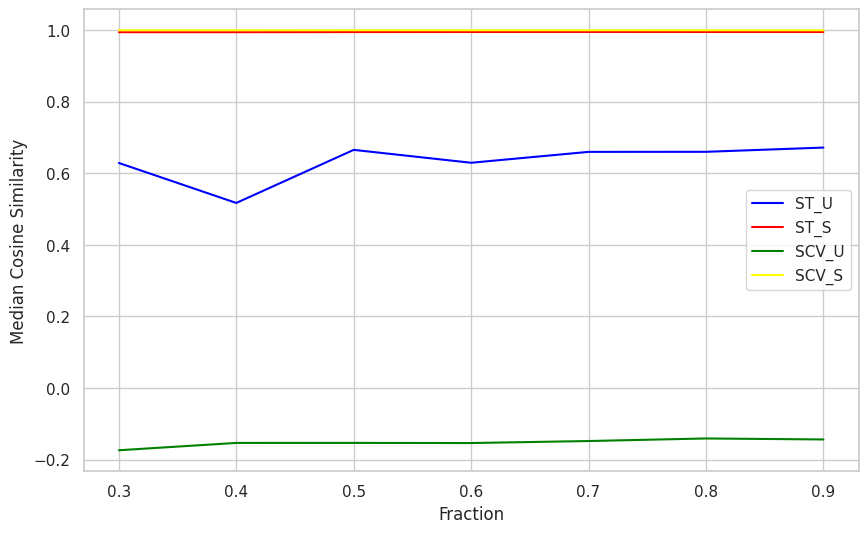

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming y1, y2, and x are numpy arrays
y1 = np.array(st_acc_u)
y2 = np.array(st_acc_s)
y3 = np.array(scv_acc_u)
y4 = np.array(scv_acc_s)
x = frac_list
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure and a set of subplots
plt.figure(figsize=(10, 6))

# Plot y1 vs x
sns.lineplot(x=x, y=y1, color='blue', label='ST_U')

# Plot y2 vs x
sns.lineplot(x=x, y=y2, color='red', label='ST_S')
sns.lineplot(x=x, y=y3, color='green', label='SCV_U')
sns.lineplot(x=x, y=y4, color='yellow', label='SCV_S')

# Adding title and labels
plt.xlabel('Fraction')
plt.ylabel('Median Cosine Similarity')

# Show legend
plt.legend()

# Display the plot
plt.show()


In [7]:
import pandas as pd

# Assuming all your lists are of the same length and frac_list is the list of row names
df = pd.DataFrame({
    'scv_acc_s': scv_acc_s,
    'scv_acc_u': scv_acc_u,
    'scv_time': scv_time,
    'st_acc_s': st_acc_s,
    'st_acc_u': st_acc_u,
    'st_time': st_time
}, index=frac_list)

df

,scv_acc_s,scv_acc_u,scv_time,st_acc_s,st_acc_u,st_time
0.3,0.999382,-0.173574,0.014700,0.994007,0.628767,15.813015
0.4,0.999404,-0.153126,0.019875,0.994028,0.517093,15.178586
0.5,0.999377,-0.153070,0.020967,0.994350,0.665330,14.718744
0.6,0.999382,-0.153446,0.025817,0.994609,0.629340,9.141153
0.7,0.999363,-0.147812,0.032269,0.994696,0.659725,11.565779
0.8,0.999351,-0.140663,0.037713,0.994630,0.659902,22.599239
0.9,0.999346,-0.143438,0.047441,0.994581,0.671752,42.141003


In [8]:
# Export the DataFrame to a CSV file
df.to_csv('toggle_benchmark.csv', index=True)